# NetworkX API Demonstrations

This notebook demonstrates the native NetworkX API functions and the wrapper layer built for fraud detection.

## Setup

In [1]:
# Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Native NetworkX API

### Graph Creation: `nx.DiGraph()` and `nx.Graph()`

In [2]:
# Create a directed graph (native API)
G = nx.DiGraph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")

# Add edges with attributes
G.add_edge("A", "B", amount=100, fraud=0)
G.add_edge("B", "C", amount=200, fraud=1)
G.add_edge("C", "A", amount=50, fraud=0)

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

Nodes: 3
Edges: 3


### Centrality: `nx.degree_centrality()`

In [3]:
# Native API: Degree centrality
degree_cent = nx.degree_centrality(G)
print("Degree Centrality:")
print(degree_cent)

Degree Centrality:
{'A': 1.0, 'B': 1.0, 'C': 1.0}


### Centrality: `nx.betweenness_centrality()`

In [4]:
# Native API: Betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("Betweenness Centrality:")
print(betweenness)

Betweenness Centrality:
{'A': 0.5, 'B': 0.5, 'C': 0.5}


### Centrality: `nx.pagerank()`

In [5]:
# Native API: PageRank
pagerank = nx.pagerank(G)
print("PageRank:")
print(pagerank)

PageRank:
{'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.3333333333333333}


### Properties: `nx.density()`

In [6]:
# Native API: Graph density
density = nx.density(G)
print(f"Density: {density:.3f}")

Density: 0.500


### Properties: `nx.clustering()`

In [7]:
# Native API: Clustering coefficient
clustering = nx.clustering(G.to_undirected())
print("Clustering Coefficients:")
print(clustering)

Clustering Coefficients:
{'A': 1.0, 'B': 1.0, 'C': 1.0}


### Properties: `nx.connected_components()`

In [8]:
# Native API: Connected components (for undirected)
G_undirected = G.to_undirected()
components = list(nx.connected_components(G_undirected))
print(f"Number of components: {len(components)}")
print(f"Components: {components}")

Number of components: 1
Components: [{'A', 'B', 'C'}]


## Wrapper Layer Demonstrations

### Creating Sample Transaction Data

In [9]:
# Create sample transaction DataFrame
np.random.seed(42)
transactions = []
users = [f'User{i}' for i in range(1, 11)]

for i in range(30):
    sender = np.random.choice(users)
    receiver = np.random.choice([u for u in users if u != sender])
    amount = np.random.uniform(50, 500)
    is_fraud = 1 if amount > 400 else 0
    
    transactions.append({
        'nameOrig': sender,
        'nameDest': receiver,
        'amount': amount,
        'type': 'TRANSFER',
        'isFraud': is_fraud
    })

df = pd.DataFrame(transactions)
print(f"Transactions: {len(df)}")
print(f"Fraud rate: {df['isFraud'].mean()*100:.1f}%")
df.head()

Transactions: 30
Fraud rate: 16.7%


,nameOrig,nameDest,amount,type,isFraud
0,User7,User4,477.821438,TRANSFER,1
1,User8,User5,120.208388,TRANSFER,0
2,User3,User8,76.137625,TRANSFER,0
3,User8,User5,320.501755,TRANSFER,0
4,User8,User3,59.263022,TRANSFER,0


### Wrapper: `create_transaction_graph()`

Wraps `nx.DiGraph()` and `add_edge()` to convert DataFrame to graph.

In [10]:
from utils import create_transaction_graph

# Use wrapper to create graph
G = create_transaction_graph(df, directed=True)
print(f"Created graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

2025-12-07 22:02:36.561 | INFO     | utils:create_transaction_graph:52 - Created graph: 10 nodes, 27 edges


Created graph: 10 nodes, 27 edges


### Wrapper: `compute_degree_centrality()`

Wraps `nx.degree_centrality()` with logging.

In [11]:
from utils import compute_degree_centrality

degree_cent = compute_degree_centrality(G)
print("Top 3 by degree:")
sorted_deg = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_deg[:3]:
    print(f"  {node}: {score:.4f}")

2025-12-07 22:02:36.566 | INFO     | utils:compute_degree_centrality:70 - Degree centrality computed


Top 3 by degree:
  User2: 0.8889
  User10: 0.7778
  User4: 0.6667


### Wrapper: `compute_betweenness_centrality()`

Wraps `nx.betweenness_centrality()` with logging.

In [12]:
from utils import compute_betweenness_centrality

betweenness = compute_betweenness_centrality(G)
print("Top 3 by betweenness:")
sorted_bet = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_bet[:3]:
    print(f"  {node}: {score:.4f}")

2025-12-07 22:02:36.572 | INFO     | utils:compute_betweenness_centrality:84 - Betweenness centrality computed


Top 3 by betweenness:
  User3: 0.3227
  User4: 0.2597
  User2: 0.2167


### Wrapper: `compute_pagerank()`

Wraps `nx.pagerank()` with logging.

In [13]:
from utils import compute_pagerank

pagerank = compute_pagerank(G)
print("Top 3 by PageRank:")
sorted_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_pr[:3]:
    print(f"  {node}: {score:.4f}")

2025-12-07 22:02:37.218 | INFO     | utils:compute_pagerank:98 - PageRank computed


Top 3 by PageRank:
  User3: 0.1911
  User8: 0.1729
  User10: 0.1385


### Wrapper: `get_top_central_nodes()`

Convenience wrapper combining centrality computation and sorting.

In [14]:
from utils import get_top_central_nodes

# Get top nodes by degree
top_degree = get_top_central_nodes(G, metric='degree', top_n=5)
print("Top 5 by degree:")
for node, score in top_degree:
    print(f"  {node}: {score:.4f}")

# Get top nodes by PageRank
top_pagerank = get_top_central_nodes(G, metric='pagerank', top_n=5)
print("\nTop 5 by PageRank:")
for node, score in top_pagerank:
    print(f"  {node}: {score:.4f}")

Top 5 by degree:
  User2: 0.8889
  User10: 0.7778
  User4: 0.6667
  User8: 0.6667
  User5: 0.5556

Top 5 by PageRank:
  User3: 0.1911
  User8: 0.1729
  User10: 0.1385
  User5: 0.1227
  User1: 0.1162


### Wrapper: `analyze_network_structure()`

Combines multiple native functions: `number_of_nodes()`, `number_of_edges()`, `density()`, `is_connected()`, etc.

In [15]:
from utils import analyze_network_structure

stats = analyze_network_structure(G)
print("Network Statistics:")
for key, value in stats.items():
    print(f"  {key}: {value}")

2025-12-07 22:02:37.537 | INFO     | utils:analyze_network_structure:176 - Network structure analyzed


Network Statistics:
  nodes: 10
  edges: 27
  density: 0.3
  avg_degree: 5.4
  is_connected: True
  num_components: 1


### Wrapper: `find_fraud_nodes()`

Uses `G.edges(data=True)` to identify fraud-involved nodes.

In [16]:
from utils import find_fraud_nodes

fraud_nodes = find_fraud_nodes(G)
print(f"Fraud-involved nodes: {fraud_nodes}")
print(f"Count: {len(fraud_nodes)}")

2025-12-07 22:02:37.702 | INFO     | utils:find_fraud_nodes:199 - Found 7 nodes involved in fraud


Fraud-involved nodes: {'User8', 'User4', 'User9', 'User1', 'User10', 'User7', 'User2'}
Count: 7


### Wrapper: `find_hub_accounts()`

Uses `G.degree()` with statistical thresholds.

In [17]:
from utils import find_hub_accounts

hubs = find_hub_accounts(G, threshold_percentile=80)
print(f"Hub accounts (top 20%):")
for node, degree in hubs:
    print(f"  {node}: {degree} connections")

2025-12-07 22:02:37.871 | INFO     | utils:find_hub_accounts:217 - Found 2 hub accounts (>80th percentile)


Hub accounts (top 20%):
  User2: 8 connections
  User10: 7 connections


### Wrapper: `find_intermediary_accounts()`

Uses `nx.betweenness_centrality()` with statistical thresholds.

In [18]:
from utils import find_intermediary_accounts

intermediaries = find_intermediary_accounts(G, threshold_percentile=80)
print(f"Intermediary accounts:")
for node, score in intermediaries[:5]:
    print(f"  {node}: {score:.4f}")

2025-12-07 22:02:38.038 | INFO     | utils:find_intermediary_accounts:236 - Found 2 intermediary accounts


Intermediary accounts:
  User4: 0.2597
  User3: 0.3227


### Wrapper: `detect_fraud_rings()`

Combines `nx.connected_components()` and `nx.density()` for fraud ring detection.

In [19]:
from utils import detect_fraud_rings

rings = detect_fraud_rings(G, min_size=2)
print(f"Suspicious communities: {len(rings)}")
for i, ring in enumerate(rings[:2], 1):
    print(f"\nRing {i}:")
    print(f"  Size: {ring['size']}")
    print(f"  Density: {ring['density']:.3f}")
    print(f"  Has fraud: {ring['has_fraud']}")

2025-12-07 22:02:38.206 | INFO     | utils:detect_fraud_rings:274 - Found 1 suspicious communities


Suspicious communities: 1

Ring 1:
  Size: 10
  Density: 0.300
  Has fraud: True


### Wrapper: `compute_fraud_risk_score()`

Custom fraud scoring using degree centrality and fraud ratio.

In [20]:
from utils import compute_fraud_risk_score

# Score individual nodes
for node in list(G.nodes())[:5]:
    risk = compute_fraud_risk_score(G, node)
    print(f"{node}: Risk = {risk:.3f}")

User7: Risk = 0.478
User4: Risk = 0.267
User8: Risk = 0.267
User5: Risk = 0.222
User3: Risk = 0.222


### Wrapper: `rank_nodes_by_fraud_risk()`

Ranks all nodes by fraud risk score.

In [21]:
from utils import rank_nodes_by_fraud_risk

risky_accounts = rank_nodes_by_fraud_risk(G, top_n=5)
print("Top 5 risky accounts:")
for node, score in risky_accounts:
    print(f"  {node}: {score:.3f}")

2025-12-07 22:02:38.538 | INFO     | utils:rank_nodes_by_fraud_risk:322 - Ranked top 5 nodes by fraud risk


Top 5 risky accounts:
  User7: 0.478
  User2: 0.431
  User9: 0.342
  User1: 0.328
  User10: 0.311


### Wrapper: `visualize_network()`

Uses `nx.spring_layout()`, `nx.draw_networkx_nodes()`, `nx.draw_networkx_edges()` with fraud highlighting.

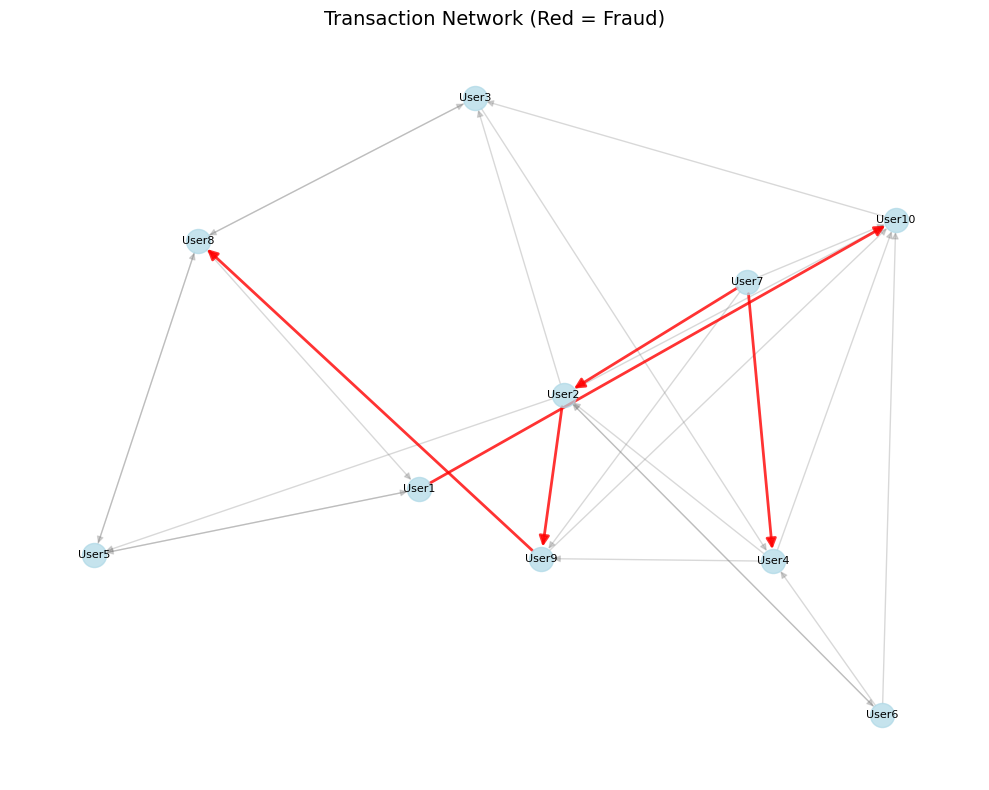

In [22]:
from utils import visualize_network

visualize_network(G, highlight_fraud=True, figsize=(10, 8))

### Wrapper: `plot_degree_distribution()`

Visualizes degree distribution using matplotlib.

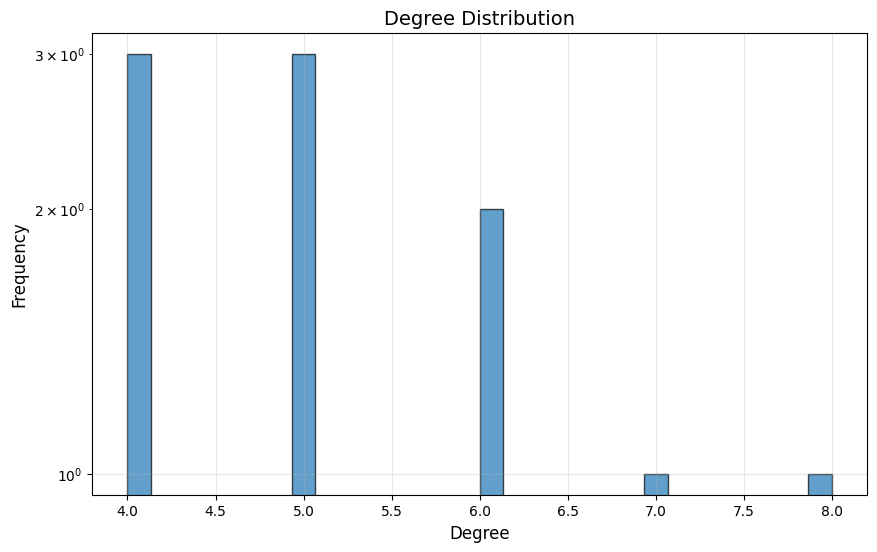

In [23]:
from utils import plot_degree_distribution

plot_degree_distribution(G)

## Summary

**Native NetworkX API Demonstrated:**
- `nx.DiGraph()` - Graph creation
- `nx.degree_centrality()` - Degree centrality
- `nx.betweenness_centrality()` - Betweenness centrality
- `nx.pagerank()` - PageRank
- `nx.density()` - Graph density
- `nx.clustering()` - Clustering coefficient
- `nx.connected_components()` - Component analysis

**Wrapper Layer Demonstrated:**
- `create_transaction_graph()` - DataFrame to graph conversion
- `compute_degree_centrality()`, `compute_betweenness_centrality()`, `compute_pagerank()` - Centrality wrappers
- `get_top_central_nodes()` - Convenience function
- `analyze_network_structure()` - Comprehensive stats
- `find_fraud_nodes()`, `find_hub_accounts()`, `find_intermediary_accounts()` - Fraud detection
- `detect_fraud_rings()` - Community detection
- `compute_fraud_risk_score()`, `rank_nodes_by_fraud_risk()` - Risk scoring
- `visualize_network()`, `plot_degree_distribution()` - Visualization